In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Загрузите файл HR.csv в pandas dataframe

In [3]:
hr = pd.read_csv('HR.csv', sep=',')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).

In [4]:
hr.iloc[:,:5].describe().round(2).loc[['50%', 'mean', 'min', 'max', 'std']]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
50%,0.64,0.72,4.00,200.00,3.00
mean,0.61,0.72,3.80,201.05,3.50
min,0.09,0.36,2.00,96.00,2.00
max,1.00,1.00,7.00,310.00,10.00
std,0.25,0.17,1.23,49.94,1.46


In [5]:
hr.iloc[:,5:10].mode()

,Work_accident,left,promotion_last_5years,department,salary
0,0,0,0,sales,low


Рассчитайте и визуализируйте корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.

In [29]:
hr_new = hr[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']]
hr_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


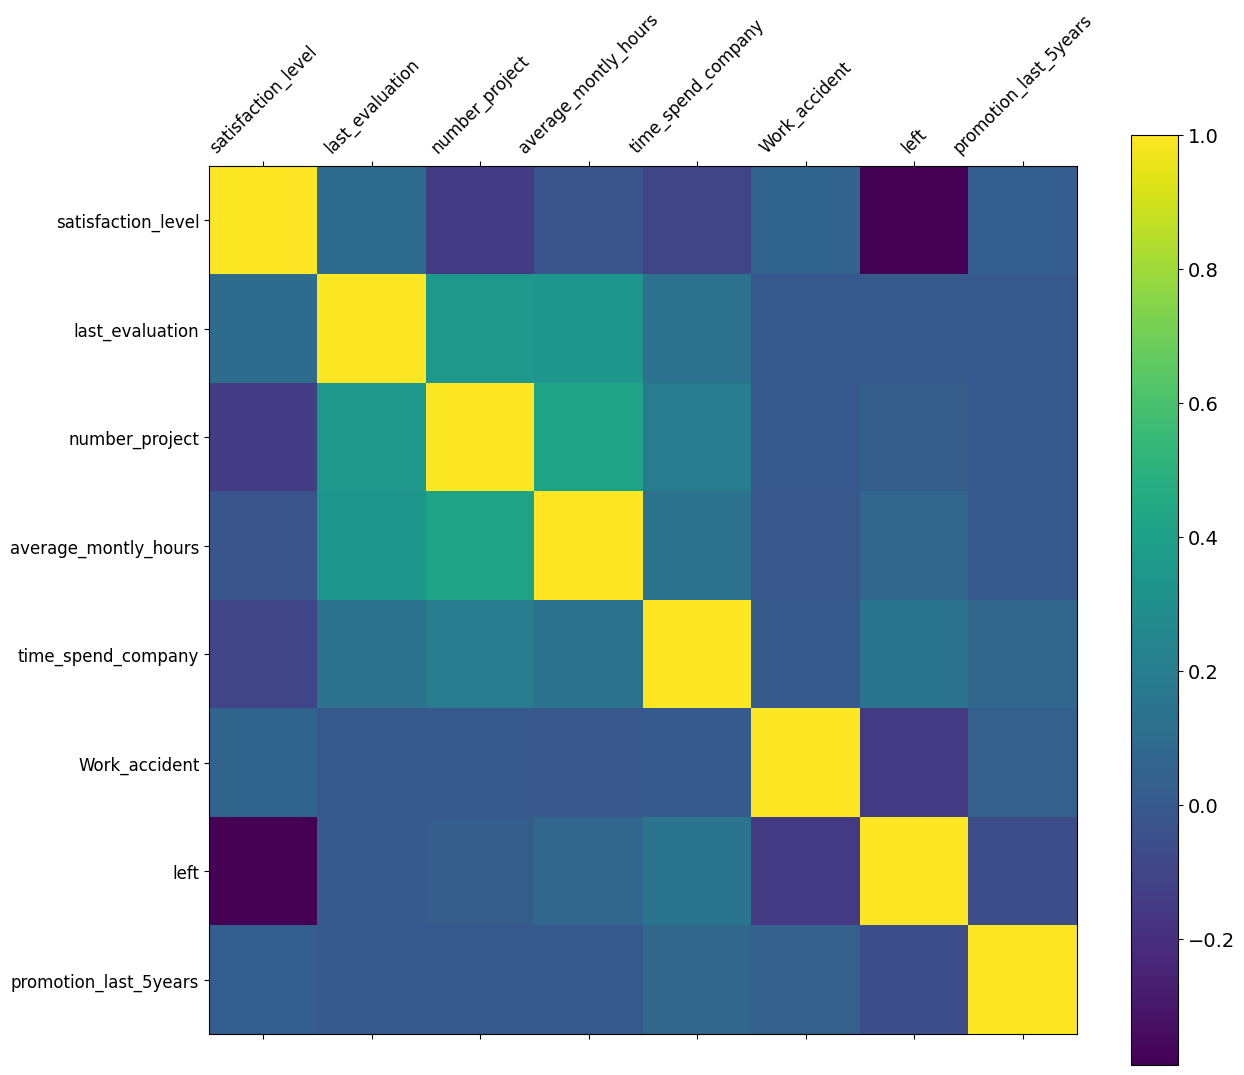

In [34]:
f = plt.figure(figsize=(14, 12))
plt.matshow(hr_new.corr(), fignum=f.number)
plt.xticks(range(hr_new.shape[1]), hr_new.columns, fontsize=12, rotation=45)
plt.yticks(range(hr_new.shape[1]), hr_new.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

**Самые скоррелированные:**

average_montly_hours и number_project

**Менее скоррелированные:**

left и satisfaction_level

Рассчитайте сколько сотрудников работает в каждом
департаменте.

In [35]:
hr.groupby('department').size()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64

Показать распределение сотрудников по зарплатам.

In [37]:
hr.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности.

In [39]:
hr.pivot_table(index='department', columns='salary', aggfunc='size')

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом.

In [40]:
print('Среднее количество рабочих часов сотрудников c низким окладом', hr[hr.salary == 'low']['average_montly_hours'].mean())
print('Среднее количество рабочих часов сотрудников с высоким окладом', hr[hr.salary == 'high']['average_montly_hours'].mean())

Среднее количество рабочих часов сотрудников c низким окладом 200.9965828321487
Среднее количество рабочих часов сотрудников с высоким окладом 199.86742118027485


0 гипотеза : в среднем проведенное на работе время одинаково для всех работников.

In [41]:
salary_low = hr[hr['salary'] == 'low']['average_montly_hours']
salary_high = hr[hr['salary'] == 'high']['average_montly_hours']

In [44]:
from scipy import stats
result = stats.ttest_ind(salary_low, salary_high, equal_var=False)

a = 0.05

if (result.pvalue < a):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Не отвергаем нулевую гипотезу


В среднем проведённое на работе время одинаково для всех работников.

Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
  ● Доля сотрудников с повышением за последние 5 лет
  ● Средняя степень удовлетворенности
  ● Среднее количество проектов

In [45]:
workers = hr[(hr['left'] == 0)]
retireds =  hr[(hr['left'] == 1)]

In [46]:
indicators = pd.DataFrame()
rows = []

rows.append(
    {
    'Показатель': 'Доля получивших повышение',
    'Уволившиеся': round(retireds.promotion_last_5years.value_counts(normalize=True)[1], 3),
    'Действующие': round(workers.promotion_last_5years.value_counts(normalize=True)[1], 3)
    }
)

rows.append(
    {
    'Показатель': 'Средняя степень удовлетворенности',
    'Уволившиеся': round(retireds.satisfaction_level.mean(), 3),
    'Действующие': round(workers.satisfaction_level.mean(), 3)
    }
)

rows.append(
    {
    'Показатель': 'Среднее количество проектов',
    'Уволившиеся': round(retireds.number_project.mean(), 3),
    'Действующие': round(workers.number_project.mean(), 3)
    }
)

for row in rows:
    indicators = pd.concat([indicators, pd.DataFrame([row])])

indicators

,Показатель,Уволившиеся,Действующие
0,Доля получивших повышение,0.005,0.026
0,Средняя степень удовлетворенности,0.440,0.667
0,Среднее количество проектов,3.856,3.787


Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки

In [47]:
X = hr.iloc[:,[0,1,2,3,4,5,7]]
y = hr['left']

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [53]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
model.score(X_test, y_test).round(2)

0.76

Коэффициент детерминации = 0.76, а это означает, что модель получилась хорошая (коэффициент стремится к 1).

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, model.predict(X_test)).round(2)

0.76

Точность модели высокая